In [1]:
## Squirrels


import sys
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.io as sio
from scipy import stats
import seaborn as sns

In [2]:
squirrels_data = pd.read_csv('data/2018_Central_Park_Squirrel_Census_-_Squirrel_Data.csv')
squirrels_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3023 entries, 0 to 3022
Data columns (total 36 columns):
X                                             3023 non-null float64
Y                                             3023 non-null float64
Unique Squirrel ID                            3023 non-null object
Hectare                                       3023 non-null object
Shift                                         3023 non-null object
Date                                          3023 non-null int64
Hectare Squirrel Number                       3023 non-null int64
Age                                           2902 non-null object
Primary Fur Color                             2968 non-null object
Highlight Fur Color                           1937 non-null object
Combination of Primary and Highlight Color    3023 non-null object
Color notes                                   182 non-null object
Location                                      2959 non-null object
Above Ground Sighter Me

In [3]:
squirrels_data['Age'].value_counts()

squirrels_data['Primary Fur Color'].value_counts()

Gray        2473
Cinnamon     392
Black        103
Name: Primary Fur Color, dtype: int64

In [4]:
# Keep only cinnamon and gray.

squirrels_data_cinnamon = squirrels_data.loc[squirrels_data['Primary Fur Color']  == 'Cinnamon']
squirrels_data_gray = squirrels_data.loc[squirrels_data['Primary Fur Color']  == 'Gray']

n_cinnamon_squirrels = squirrels_data_cinnamon['Primary Fur Color'].value_counts()[0]
n_gray_squirrels = squirrels_data_gray['Primary Fur Color'].value_counts()[0]
n_squirrels = n_cinnamon_squirrels + n_gray_squirrels

#df.loc[df['shield'] > 6]
print(f'The number of cinnamon squirrels found was {n_cinnamon_squirrels}')
print(f'The number of gray squirrels found was {n_gray_squirrels}')
print(f'The total number of squirrels sampled was {n_squirrels}')
print(f'If we were equally likely to observe each color squirrel, we would expect to see {n_squirrels/2} cinnamon squirrels.')
print(f'The proportion of cinnamon squirrels observed was {n_cinnamon_squirrels/n_squirrels}')



The number of cinnamon squirrels found was 392
The number of gray squirrels found was 2473
The total number of squirrels sampled was 2865
If we were equally likely to observe each color squirrel, we would expect to see 1432.5 cinnamon squirrels.
The proportion of cinnamon squirrels observed was 0.13682373472949388


In [5]:
# Let's assume that since we have two squirrel types, we are equally likely to see both squirrels in Central park...

expected_proportion = 0.13

# Compute a null distrubtion assuming we flip a coin n_squirrels times. With probability 0.5 we obesrve a gray
# squirrel and with probability 0.5 we see a cinnammon squirrel. What would this distribution look like?

# We could compute the proportion but to exemplify simulations, we will instead run 1000 trials of the above
# coin flip experiment.

replicates = range(10000)
observed_proportion_vec = np.zeros((len(replicates), 1))
squirrels = range(n_squirrels)

for rep in replicates:
    
    # Flip a coin n_squirrels times and count successes
    n_successes = 0
    
    for squirrel in squirrels:
        
        rand_float = np.random.random()
        
        if rand_float < expected_proportion:
            n_successes += 1   # add 1 to our number of successes
            
        # Done with this squirrel
        
    
    # Done with this replicate
    
    # Record n_success in our vector
    observed_proportion_vec[rep, 0] = n_successes
    if rep % 1000 == 0:
        print(f'Finished {rep} replicates')
    

print('Done with all experiments')
        
        
    



Finished 0 replicates
Finished 1000 replicates
Finished 2000 replicates
Finished 3000 replicates
Finished 4000 replicates
Finished 5000 replicates
Finished 6000 replicates
Finished 7000 replicates
Finished 8000 replicates
Finished 9000 replicates
Done with all experiments


In [6]:
# Plot the null distribution

observed_proportion_df = pd.DataFrame({'Cinnamon_observed': observed_proportion_vec.flatten()})

In [7]:
observed_proportion_df.head()

,Cinnamon_observed
0,368.0
1,382.0
2,400.0
3,415.0
4,389.0


Text(0.5, 1.0, 'Null distribution assuming proportion = 0.5')

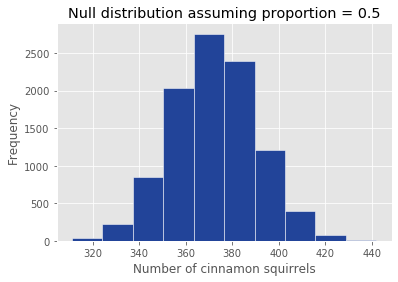

In [8]:
plt.style.use('ggplot')
observed_proportion_df.hist(color = '#224499', edgecolor = 'w')
plt.xlabel('Number of cinnamon squirrels')
plt.ylabel('Frequency')
plt.title('Null distribution assuming proportion = 0.5')
#plt.xlim(300,2500)

[Text(0, 0.5, 'Relative frequency'),
 Text(0.5, 0, 'Number of cinnamon squirrels'),
 Text(0.5, 1.0, 'Null distribution assuming proportion = 0.5')]

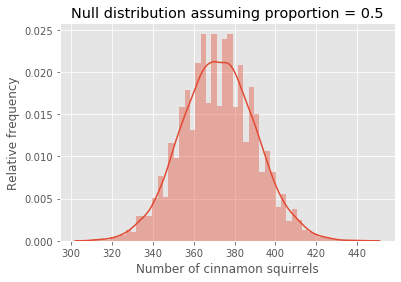

In [9]:
fig_0 = sns.distplot(observed_proportion_vec)
fig_0.set(xlabel = 'Number of cinnamon squirrels',
          ylabel = 'Relative frequency',
          title = 'Null distribution assuming proportion = 0.5')

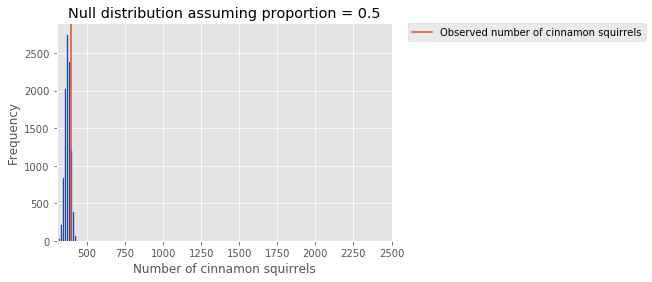

In [10]:
plt.style.use('ggplot')
observed_proportion_df.hist(color = '#224499', edgecolor = 'w')
plt.axvline([n_cinnamon_squirrels], label = 'Observed number of cinnamon squirrels')
plt.xlabel('Number of cinnamon squirrels')
plt.ylabel('Frequency')
plt.title('Null distribution assuming proportion = 0.5')
plt.xlim(300,2500)
lgd = plt.legend(loc=2, bbox_to_anchor=(1.05,1), borderaxespad = 0.0)
#plt.savefig("L7_squirrel_null_dist.pdf",bbox_extra_artists=(lgd,), bbox_inches='tight')


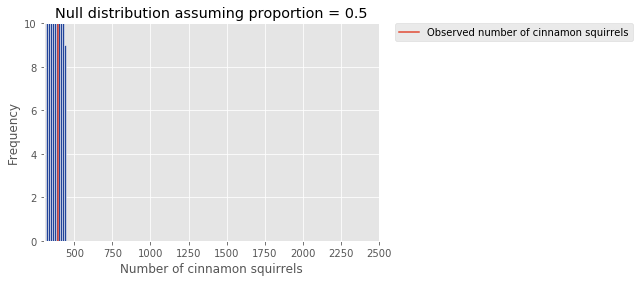

In [11]:
plt.style.use('ggplot')
observed_proportion_df.hist(color = '#224499', edgecolor = 'w')
plt.axvline([n_cinnamon_squirrels], label = 'Observed number of cinnamon squirrels')
plt.xlabel('Number of cinnamon squirrels')
plt.ylabel('Frequency')
plt.title('Null distribution assuming proportion = 0.5')
plt.xlim(300,2500)
plt.ylim(0,10)
lgd = plt.legend(loc=2, bbox_to_anchor=(1.05,1), borderaxespad = 0.0)

In [12]:
# Compute the p-value by hand

test_stat = n_cinnamon_squirrels
great_equal = []
for i in range(len(observed_proportion_vec[: ,0])):
    if observed_proportion_vec[i, 0] >= test_stat:
        great_equal.append(null_data[i])
sum_null = float(len(observed_proportion_vec[: ,0]))
sum_great_equal = float(len(great_equal))
print(sum_null, sum_great_equal)

one_sided_pval=sum_great_equal/sum_null
two_sided_pval=2*one_sided_pval

plt.figure()
plt.hist(observed_proportion_vec[: ,0],20,density=True)
plt.axvline(x=16,color = 'r')
plt.axvline(x=4, color = 'r')
#plt.xlim(0,20)
plt.show()

print(one_sided_pval)
print(two_sided_pval)

NameError: name 'null_data' is not defined

In [13]:
fireball_data = pd.read_csv('data/Fireball_And_Bolide_Reports.csv')
fireball_data.head()

,Date/Time - Peak Brightness (UT),Latitude (Deg),Longitude (Deg),Altitude (km),Velocity (km/s),Velocity Components (km/s): vx,Velocity Components (km/s): vy,Velocity Components (km/s): vz,Total Radiated Energy (J),Calculated Total Impact Energy (kt)
0,11/21/2009 08:53:00 PM,22.0S,29.2E,38.0,32.1,3.0,-17.0,-27.0,10000000000000,18.00
1,01/09/2015 10:41:11 AM,2.0N,28.8E,36.0,NaN,-10.7,-7.6,11.6,139000000000,0.41
2,05/16/2014 12:42:48 PM,44.2S,176.2W,44.0,NaN,14.4,4.6,6.5,309000000000,0.82
3,08/23/2014 06:29:41 AM,61.7S,132.6E,22.2,16.2,-2.3,5.7,16.5,3820000000000,7.60
4,12/12/2014 06:48:11 AM,33.5N,144.9E,26.3,NaN,11.5,-2.8,-2.2,33000000000,0.11


In [14]:
# Need to extract AM or PM from the Date/Time column

# First extract the Date/Time column to something easier to work with
fireball_dt = pd.DataFrame({'Date_time': fireball_data['Date/Time - Peak Brightness (UT)']})
fireball_dt.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 1 columns):
Date_time    92 non-null object
dtypes: object(1)
memory usage: 864.0+ bytes


In [15]:
type(fireball_dt['Date_time'][0])

str

In [16]:
am_pm = []
for dt in fireball_dt['Date_time']:

    if (dt.find('AM')!= -1):
        
        #Then we found AM
        am_pm.append('AM')
        #print(dt)
    else:
        am_pm.append('PM')
            
    
fireball_dt['tod'] = am_pm
fireball_dt.head()
fireball_dt['tod'].value_counts()

AM    49
PM    43
Name: tod, dtype: int64

In [17]:
# Run another simulation to comput the null distribution.
total_days = fireball_dt['tod'].value_counts().sum()
days = range(total_days)
# Keep replicates the same

observed_fireball_proportion_vec = np.zeros((len(replicates)))
expected_fireball_proportion = 0.5
for rep in replicates:
    
    # Flip a coin total_days times times and count successes
    n_PM = 0
    
    for day in days:
        
        rand_float = np.random.random()
        
        if rand_float < expected_fireball_proportion:
            n_PM += 1   # add 1 to our number of successes
            
        # Done with this day
        
    
    # Done with this replicate
    
    # Record n_success in our vector
    observed_fireball_proportion_vec[rep] = n_PM
    if rep % 1000 == 0:
        print(f'Finished {rep} replicates')
    

print('Done with all experiments')
        

Finished 0 replicates
Finished 1000 replicates
Finished 2000 replicates
Finished 3000 replicates
Finished 4000 replicates
Finished 5000 replicates
Finished 6000 replicates
Finished 7000 replicates
Finished 8000 replicates
Finished 9000 replicates
Done with all experiments


Text(0, 0.5, 'Frequency')

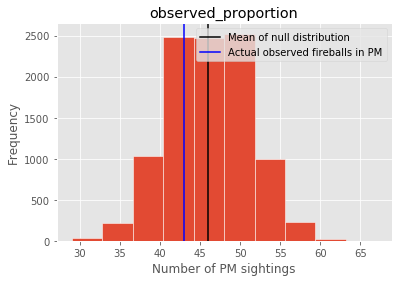

In [18]:
observed_fireball_proportion_df = pd.DataFrame({'observed_proportion': observed_fireball_proportion_vec})
n_PM_fireballs = fireball_dt['tod'].value_counts()[1]

observed_fireball_proportion_df.hist(bins = 10, edgecolor = 'w')
plt.axvline(x = observed_fireball_proportion_vec.mean(),
             color = 'k',
             label = 'Mean of null distribution')
plt.axvline(x = n_PM_fireballs, color = 'b', label = 'Actual observed fireballs in PM')
plt.legend()
plt.xlabel('Number of PM sightings')
plt.ylabel('Frequency')


In [213]:
# Compute the p-value by hand

def compute_p_value_onesample(test_statistic, null_data, direction):
        # direction = 'less' or 'greater'. If 'less', we count number of values <= the test statistic,
        # if direction = 'greater', we count the number of values >= test statistic
        more_extreme_values = []
        
        if (direction == 'less'):
            for data_point in null_data:
                if (data_point <= test_statistic):
                    more_extreme_values.append(data_point)
        else:
            for data_point in null_data:
                if (data_point >= test_statistic):
                    more_extreme_values.append(data_point)
                    
        n_null_values = len(null_data)
        n_more_extreme_values = len(more_extreme_values)
        print(f'Of the {n_null_values} null values, {n_more_extreme_values} were more extreme than our test statistic of {test_statistic}.')
        
        p_value_one_sided = n_more_extreme_values/n_null_values
        p_value_two_sided = 2.0 * p_value_one_sided
        
        return p_value_one_sided, p_value_two_sided

p1, p2 = compute_p_value_onesample(n_PM_fireballs,observed_fireball_proportion_vec, 'less')
                
        
print(p1,p2)





Of the 10000 null values, 2976 were more extreme than our test statistic of 43.
0.2976 0.5952


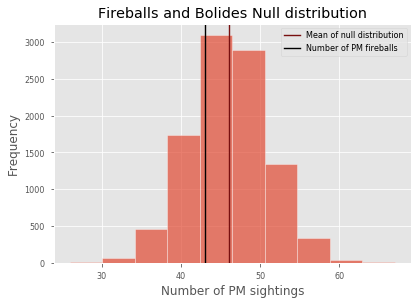

In [223]:
observed_fireball_proportion_df.hist(bins = 10, edgecolor = 'w', alpha = 0.7)
plt.axvline(x = observed_fireball_proportion_vec.mean(), label = 'Mean of null distribution', color = '#781010')
plt.axvline(x = n_PM_fireballs, label = 'Number of PM fireballs', color = 'k')
plt.xlabel('Number of PM sightings')
plt.ylabel('Frequency')
plt.title('Fireballs and Bolides Null distribution')
plt.legend()
plt.savefig('L7_fireball_distribution.pdf')

In [19]:
n_PM_fireballs

43

In [20]:
43/92

0.4673913043478261